In [3]:
#1.1
# Import modules
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
# Open a netCDF4 file
ds = xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc", engine="netcdf4")
# Show dataset
ds

<xarray.Dataset>
Dimensions:                  (time: 210, bnds: 2, lat: 36, lon: 72, pressure: 10)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 ...
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

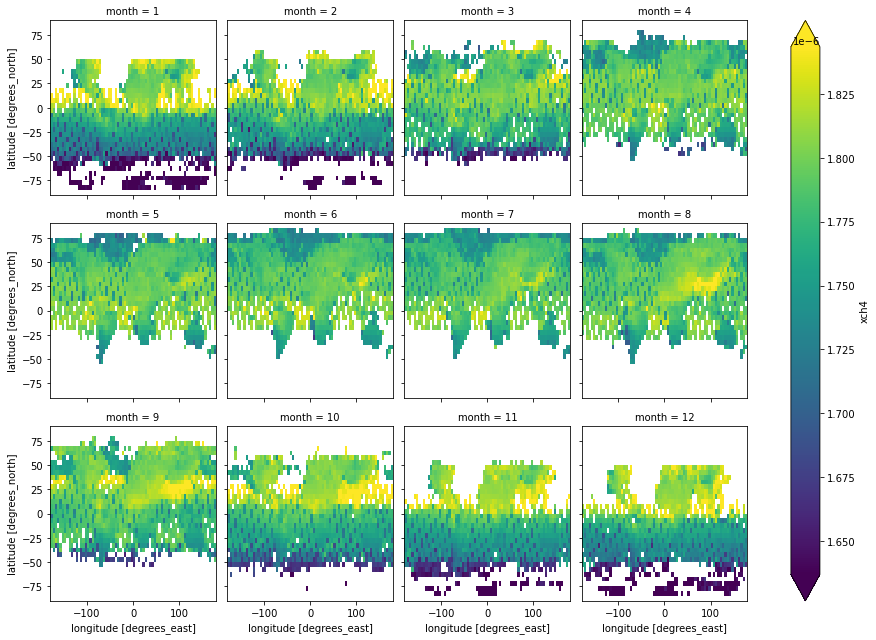

In [4]:
#Get the CH4 data
CH4 = ds.xch4
# Group data by month to get climatology
group_data = CH4.groupby('time.month').mean()
#Plot the data
#I didn't understand the meaning of this step, 
#so I asked ShenHan how to draw and he taught me the easy way to plot 
#Then I found we learn it in Section 7,https://zhu-group.github.io/ese5023/Section_07.html
group_data.plot(col="month",col_wrap=4,robust=True) 
plt.show() 

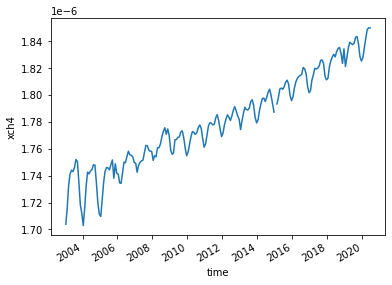

In [5]:
#1.2
#get the data from 2003-2020
CH4_Global=CH4.mean(dim=('lat', 'lon')).sel(time=slice("2003-01", "2020-06"))
#plot it
CH4_Global.plot()
plt.show()

#Describe the plot

#Methane concentration fluctuates dynamically over time, 
#but the overall trend is upward and the concentration is getting higher and higher

C:\Users\dell\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\dell\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


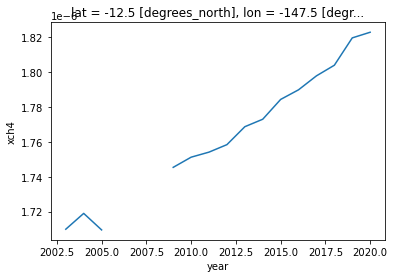

In [7]:
#1.3
#I asked Shishao about the meaning of the question,and he told me that the teacher used this method to solve the question in his paper. So I also use the yearly averaged values to plot.
point_CH4 = CH4.sel(time=slice("2003-01", "2020-06")).sel(lon=-150, lat =-15, method='nearest')
point_CH4.groupby('time.year').mean().plot()
plt.show()
#There are some breakpoint in the figure, maybe some missing value in dataset. And the concention of CH4 is increasing with time going by.

In [12]:
#2.1
# Open a netCDF4 file
data = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
# Show dataset
data

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [18]:
#get the data of SST
SST=data.sst.sel(lon=slice(-170+360,-120+360), lat=slice(-5, 5)).mean(dim=('lon','lat'))
#Calculate 3-month running mean
SST_rol=SST.rolling(time=3,center=True).mean()
# Calculate the anomlies
group_data = SST_rol.groupby('time.month')
SST_anom = group_data - group_data.mean(dim='time')
SST_anom

<xarray.DataArray 'sst' (time: 684)>
array([            nan, -3.52058411e-01, -3.07853699e-01, -2.10880280e-01,
       -2.40726471e-01, -2.25728989e-01, -1.61642075e-01, -9.31510925e-02,
       -1.72449112e-01, -2.97628403e-01, -3.16455841e-01, -2.66429901e-01,
       -1.87906265e-01, -1.88680649e-01, -1.86565399e-01, -1.24500275e-01,
        3.54194641e-02,  7.36808777e-02, -8.31851959e-02, -4.22416687e-01,
       -6.63099289e-01, -6.88962936e-01, -5.68630219e-01, -4.65534210e-01,
       -4.49098587e-01, -4.45554733e-01, -4.52938080e-01, -4.89137650e-01,
       -4.86087799e-01, -4.22689438e-01, -3.40246201e-01, -4.22336578e-01,
       -5.52133560e-01, -7.18961716e-01, -7.83073425e-01, -8.07601929e-01,
       -6.51060104e-01, -3.29572678e-01, -3.79734039e-02,  5.08155823e-02,
        5.32474518e-02,  2.24658966e-01,  5.19973755e-01,  7.31996536e-01,
        7.80866623e-01,  8.18628311e-01,  9.42928314e-01,  9.35924530e-01,
        8.10529709e-01,  4.14836884e-01, -8.04691315e-02, -5.42263031e-01,
       -8.14065933e-01, -8.64004135e-01, -9.41457748e-01, -1.04431534e+00,
       -1.17953682e+00, -1.24540520e+00, -1.22883606e+00, -1.10599327e+00,
       -7.95251846e-01, -4.21403885e-01, -1.85947418e-01,  2.64034271e-02,
        2.60988235e-01,  5.57201385e-01,  8.80437851e-01,  1.10925293e+00,
        1.34669876e+00,  1.46174431e+00,  1.51627159e+00,  1.38736725e+00,
        1.16686630e+00,  1.02093124e+00,  8.11641693e-01,  4.65002060e-01,
        1.96592331e-01,  8.32252502e-02,  6.71024323e-02, -7.60116577e-02,
...
       -1.36054802e+00, -1.42088509e+00, -1.39449310e+00, -1.41278648e+00,
       -1.30362320e+00, -1.12896538e+00, -8.00067902e-01, -4.95422363e-01,
       -1.95692062e-01, -7.09781647e-02, -1.23596191e-01, -3.31645966e-01,
       -5.43027878e-01, -7.74984360e-01, -9.15246964e-01, -9.12910461e-01,
       -7.66300201e-01, -5.23027420e-01, -3.39998245e-01, -1.79428101e-01,
       -5.36174774e-02,  5.45444489e-02,  2.09587097e-01,  4.63119507e-01,
        6.14858627e-01,  6.53985977e-01,  2.47413635e-01, -2.06434250e-01,
       -5.52478790e-01, -5.37473679e-01, -2.73836136e-01, -1.03874207e-01,
       -5.97114563e-02, -1.80364609e-01, -2.66248703e-01, -2.59502411e-01,
       -1.97811127e-01, -1.51571274e-01, -2.10556030e-01, -3.75471115e-01,
       -5.43535233e-01, -5.30231476e-01, -3.43408585e-01,  1.84631348e-03,
        1.98339462e-01,  2.20209122e-01,  9.81521606e-02,  1.13662720e-01,
        2.57211685e-01,  5.44559479e-01,  7.00805664e-01,  7.22866058e-01,
        6.20531082e-01,  5.86917877e-01,  6.80723190e-01,  8.33906174e-01,
        1.01699257e+00,  1.18348122e+00,  1.40072823e+00,  1.65809822e+00,
        1.96467781e+00,  2.31360245e+00,  2.51591873e+00,  2.54914284e+00,
        2.36565018e+00,  2.07419014e+00,  1.63725281e+00,  1.07765770e+00,
        5.00917435e-01, -7.18746185e-02, -4.42483902e-01, -6.18412018e-01,
       -7.28170395e-01, -8.35844040e-01, -9.07592773e-01,             nan],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

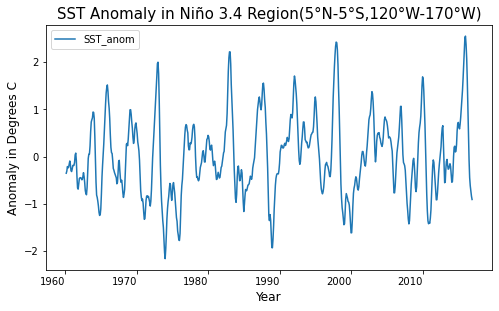

In [27]:
#2.2
#ShenHan told me that make a dataframe is easy to plot the figure, so I made a df.
#make a dataframe
df = pd.DataFrame(SST_anom,columns=['SST_anom'])
df['date'] = pd.DataFrame(SST_anom.time)
#plot the df
df.plot(x="date",y="SST_anom",figsize=(8, 5))
plt.xlabel('Year', color='k', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Anomaly in Degrees C', color='k', fontsize=12)
plt.title('SST Anomaly in Niño 3.4 Region(5°N-5°S,120°W-170°W)',fontsize=15)
plt.show()


In [9]:
#3.1
# Open a netCDF4 file
# Import modules
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

ds = xr.open_dataset("200001-201412.nc", engine="netcdf4")
# Show dataset
ds

C:\Users\dell\anaconda3\lib\site-packages\xarray\conventions.py:512: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:    (time: 180, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
    lat_bnds   (lat, nbnd) float64 ...
    lon_bnds   (lon, nbnd) float64 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/a7278f6d-6a1b-4050-8f06-a8033604736a
    variable_id:            tas
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

C:\Users\dell\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\dell\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


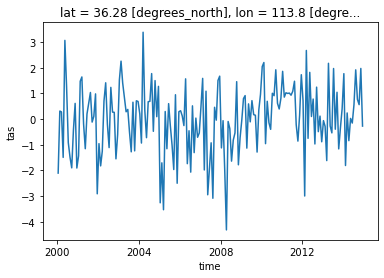

In [11]:
# Time series of the near surface temperature
# Group data by month
group_data = ds.tas.groupby('time.month')
# Apply mean to grouped data, and then compute the anomaly with monthly seasonal cycle removed
tas_anom = group_data - group_data.mean(dim='time')
tas_anom
# Plot anomaly at my hometown (Handan)
tas_anom.sel(lon=114.03, lat=36.20, method='nearest').plot()
plt.show()

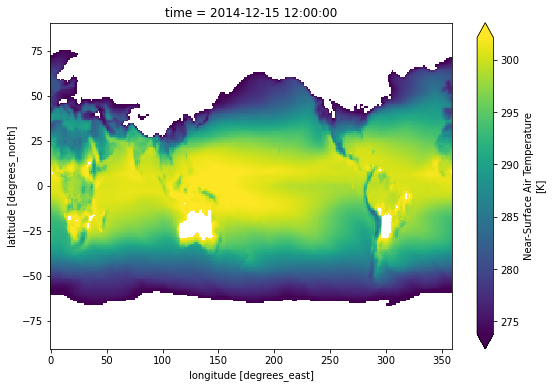

In [12]:
#3.2.1
#select the lateast data
l_data = ds.tas.isel(time=-1)
# plot the temperature where T>273 and T<303
l_data.where((l_data > 273) & (l_data < 303)).plot(size=6, robust=True)
plt.show()

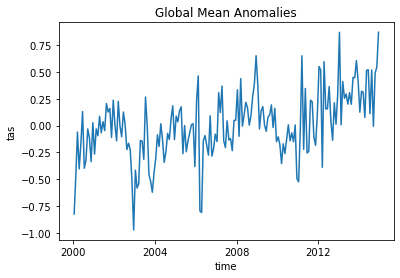

In [13]:
#3.2.2
# Plot global mean anomalies
tas_anom.mean(dim=['lat', 'lon']).plot()
plt.title('Global Mean Anomalies')
plt.show()

(array([ 14782.,  33602.,  34180.,  75866.,  93803., 124627., 264117.,
        255807., 415203.,  15117.]),
 array([206.88835, 217.73865, 228.58893, 239.43921, 250.2895 , 261.1398 ,
        271.99008, 282.84036, 293.69067, 304.54095, 315.39124],
       dtype=float32),
 <BarContainer object of 10 artists>)

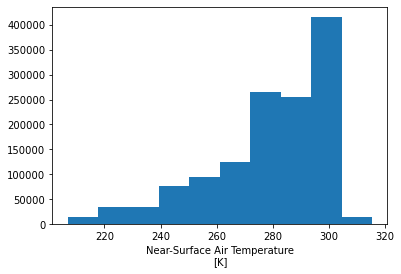

In [15]:
#3.2.3
#plot a part of data from 2013 to 2014
ds.tas.sel(time=slice("2013", "2014")).plot()

C:\Users\dell\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\dell\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


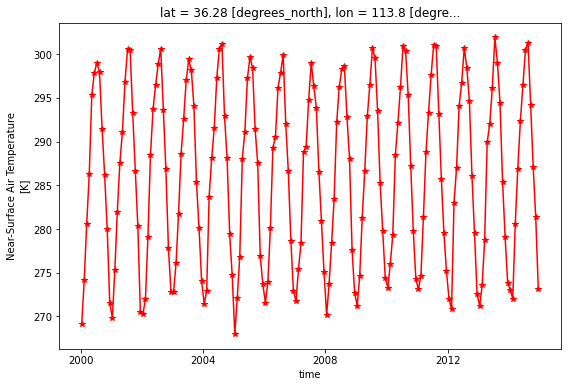

In [20]:
#3.2.4
# Time series of the near surface temperature at Handan
ds.tas.sel(lon=114.03, lat=36.20, method='nearest').plot(color='r', marker="*", size=6)
plt.show()

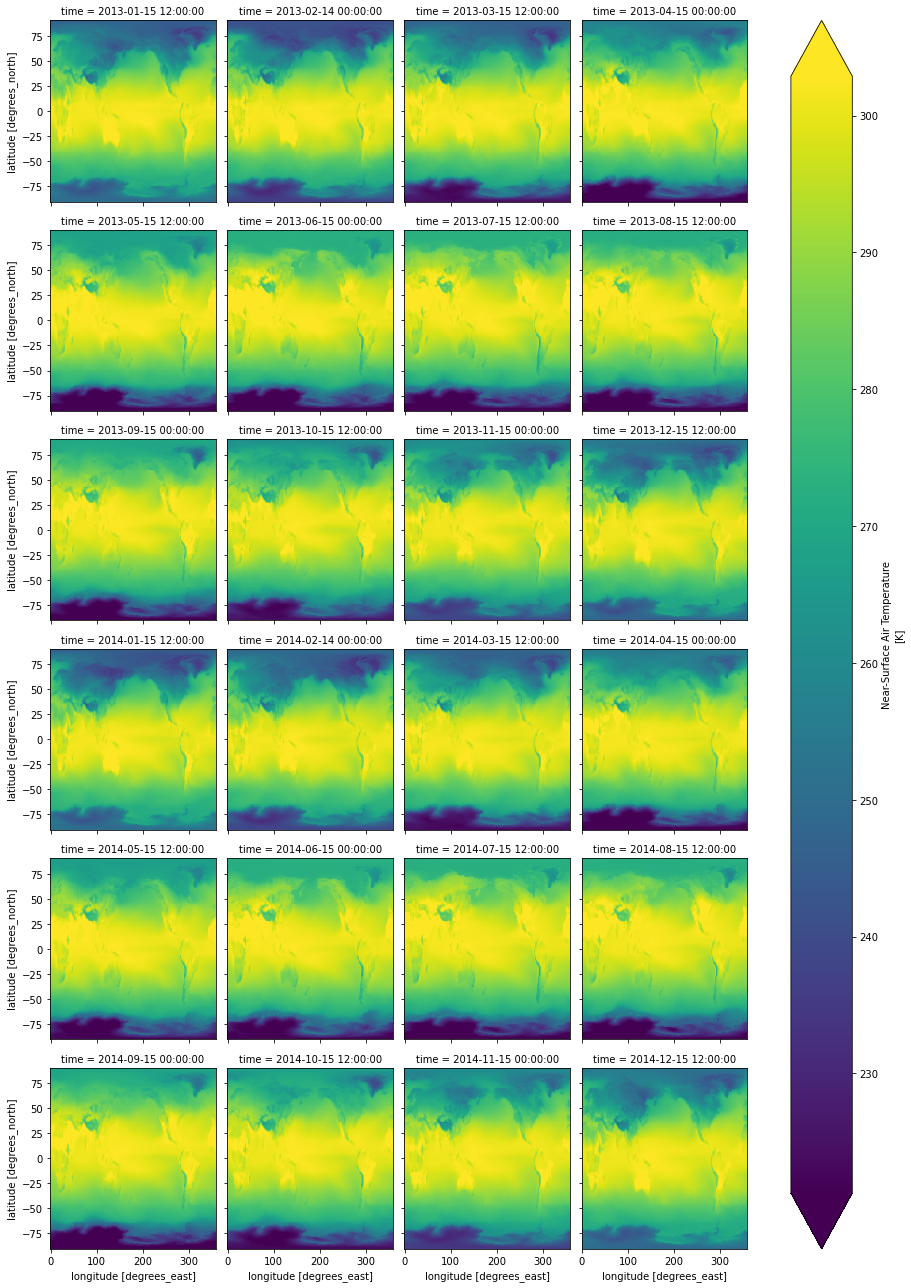

In [22]:
#3.5
# Plot monthly mean near surface temperture in 2013 and 2014, one at a panel
ds.tas.sel(time=slice("2013", "2014")).plot(col="time", col_wrap=4, robust=True)
plt.show()